In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

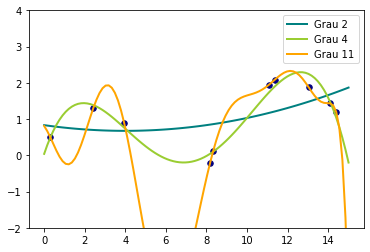

In [2]:
np.random.seed(3)

def f(x):
    """ Função de crescimento do PIB """
    return np.sin(x/1.5) + x*.1 + np.random.normal(0,0.15,size = x.shape)

# Gera pontos
x_plot = np.linspace(0,15,100)

# Gera os dados e usa uma subset para treino
x = np.linspace(0, 15, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x_train = np.sort(x[:10])
x_test = np.sort(x[10:])
y = f(x_train)
y_test = f(x_test)
X = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

# Parâmetros do gráfico
colors = ['teal', 'yellowgreen', 'orange']
lw = 2

# Ajusta polinômios de graus 2, 4 e 11
for count, degree in enumerate([2, 4, 11]):
    # Cria as variáveis polinomiais e as passa pelo modelo de regressão linear
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # COloca as previsões no gráfico
    y_plot = model.predict(X_plot)
    # plt.plot(X_plot, y_plot, color = colors[count], linewidth = lw, label = "Grau %d" %degree)
    plt.plot(x_plot, y_plot, color = colors[count], linewidth = lw, label = "Grau %d" %degree)

plt.scatter(x_train, y, color = 'navy', s=30, marker = 'o')
plt.ylim([-2,4])
plt.legend(loc='best')
plt.show()

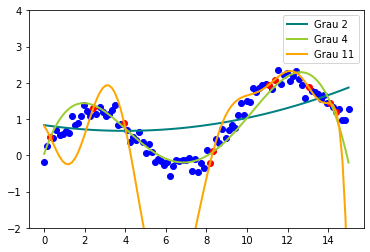

In [3]:
for count, degree in enumerate([2, 4, 11]):
    # Cria as variáveis polinomiais e as passa pelo modelo de regressão linear
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # COloca as previsões no gráfico
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color = colors[count], linewidth = lw, label = "Grau %d" %degree)

plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_train, y, color = 'red')
plt.ylim([-2,4])
plt.legend(loc='best')
plt.show()